In [1]:

import sys, os

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../load_magic/storage.py
%pprint
%matplotlib inline

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.pyplot as plt
import re
import numpy as np
from spiral_utils import StraussHoweUtilities

s = Storage()
shu = StraussHoweUtilities(s=s)

Pretty printing has been turned OFF


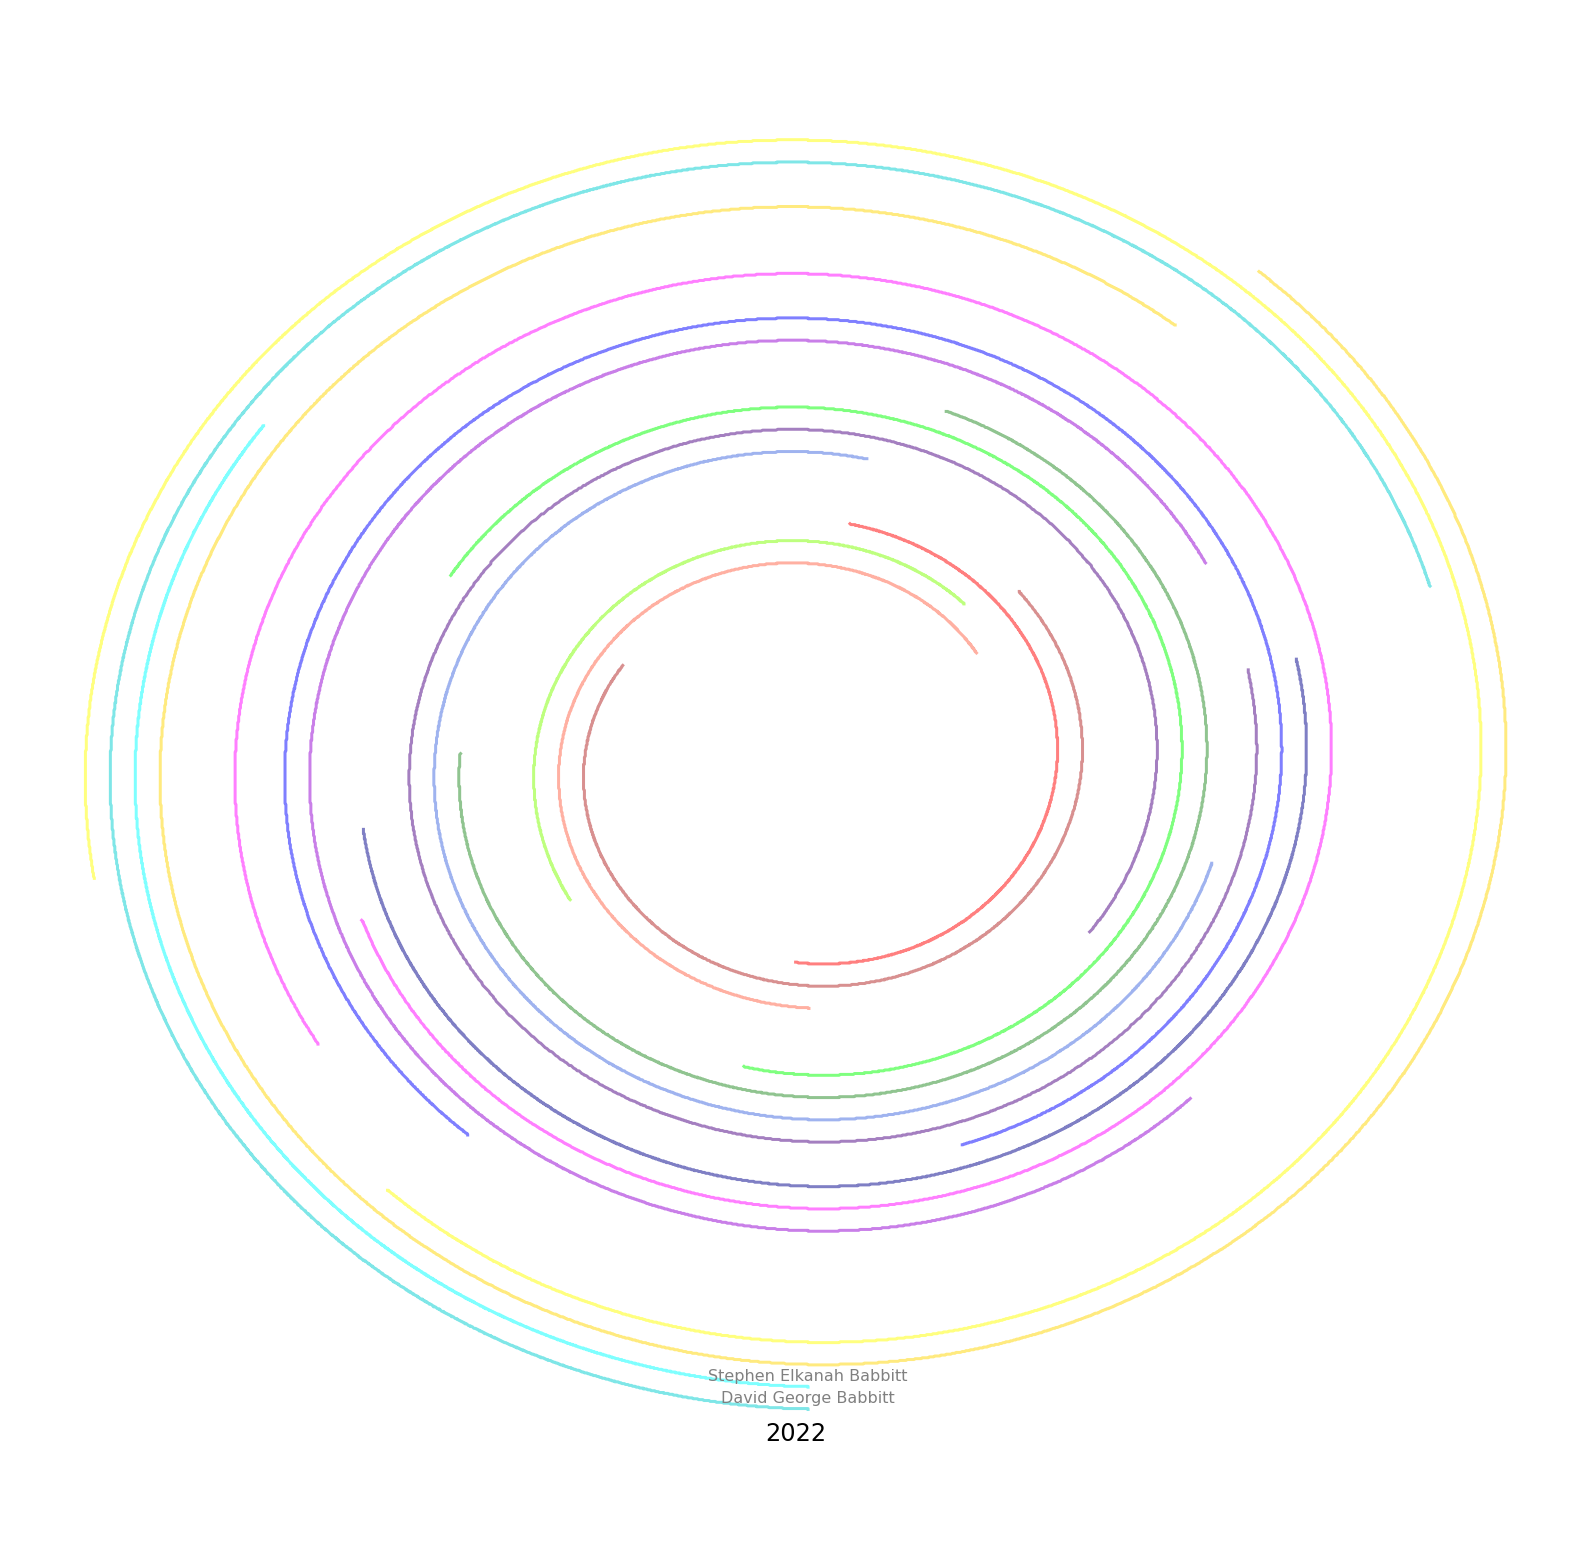

In [4]:

import imageio

fig, ax = plt.subplots(figsize=(14, 14))
shu.plot_elliptical_year(
        bottom_year=shu.now_year, history_year_dict=s.load_object('cw_history_year_dict'), radius_offset=None, ax=ax, verbose=False
    )

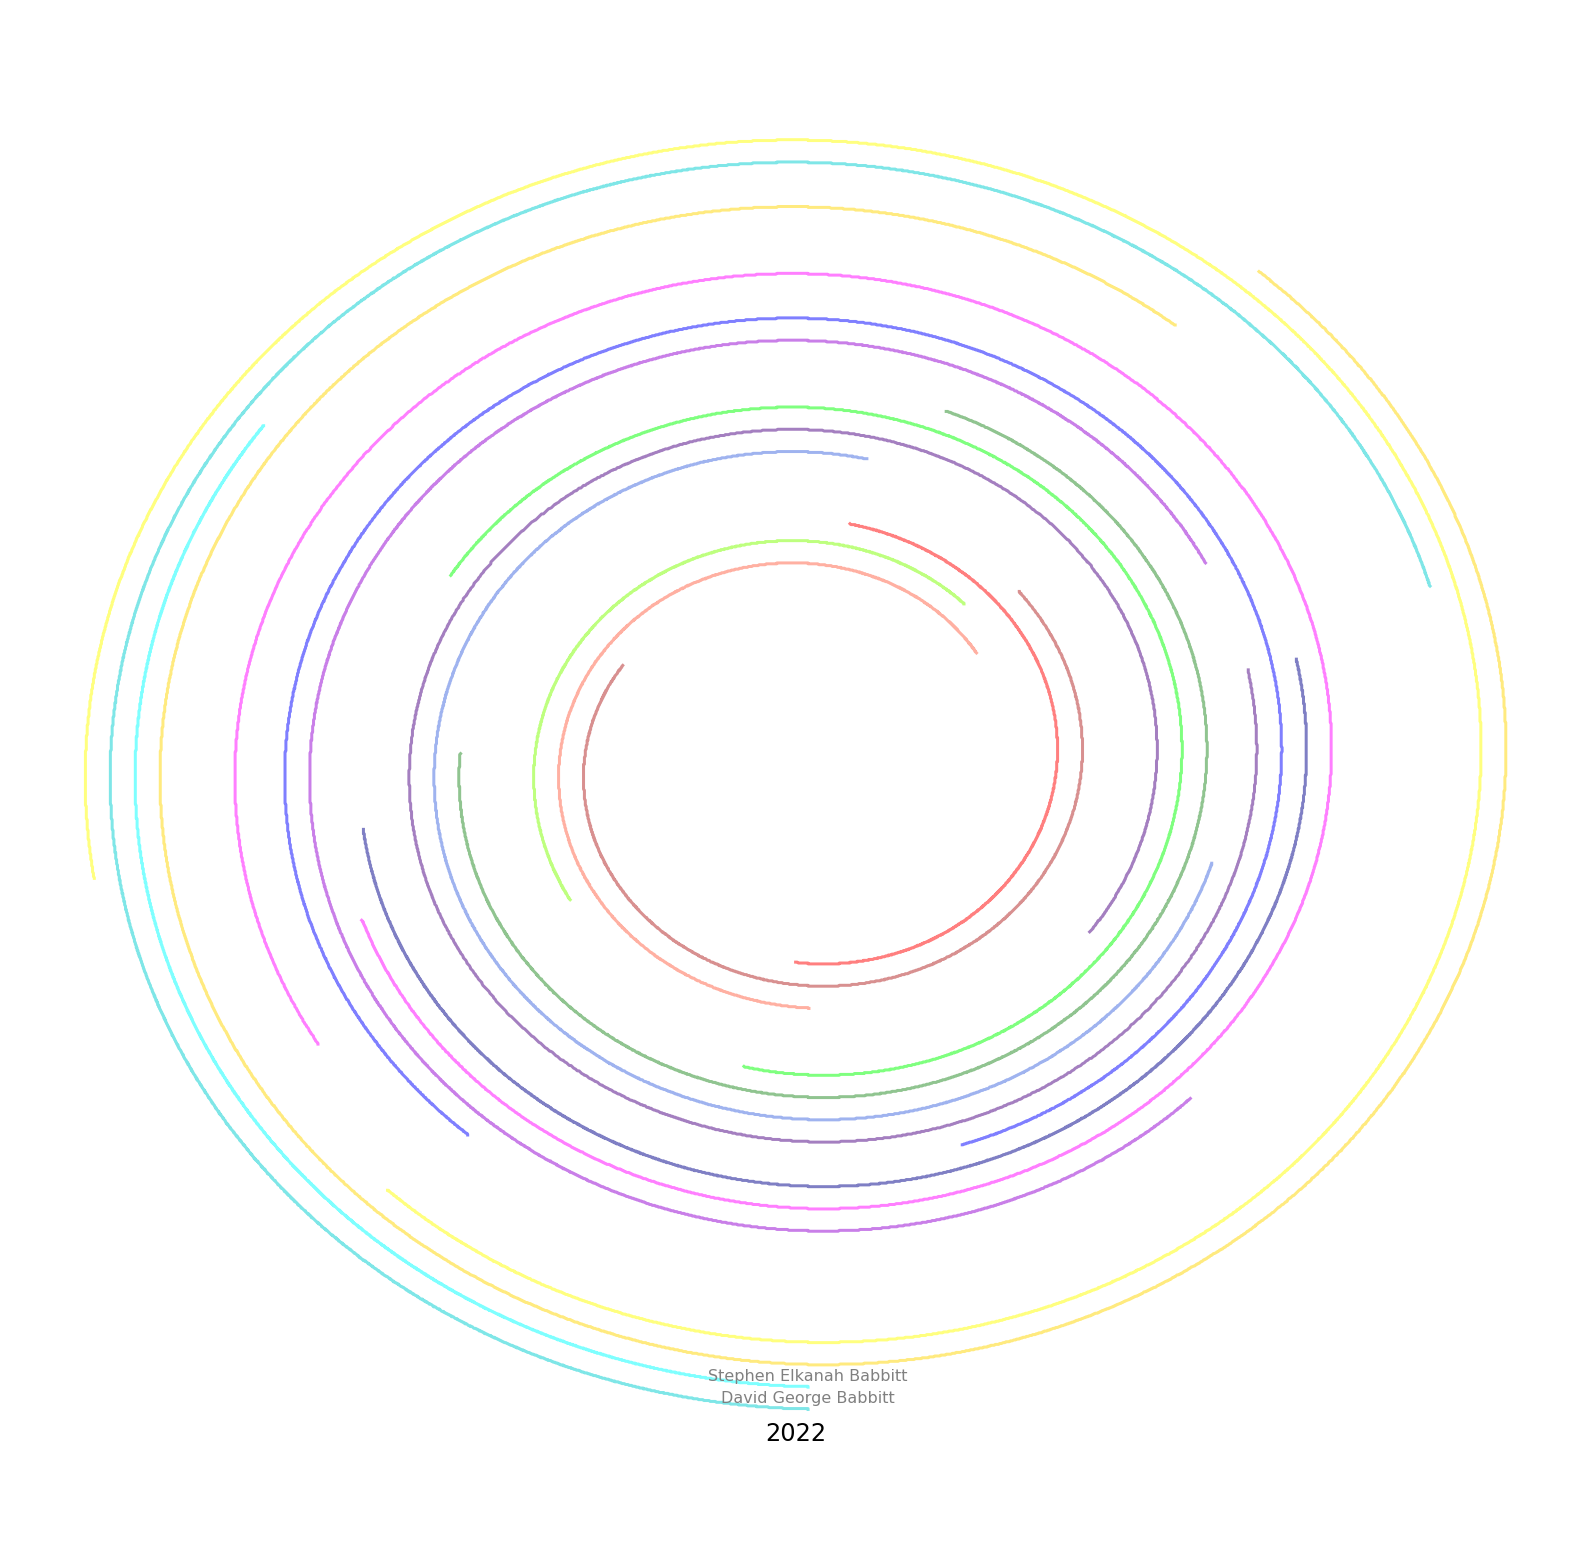

In [5]:

import imageio

fig, ax = plt.subplots(figsize=(14, 14))
cw_history_year_dict = s.load_object('cw_history_year_dict')
test_movie_folder = shu.temp_movie_folder
shu.empty_temp_folder(temp_folder=test_movie_folder)
images_list = []
for bottom_year in range(min(cw_history_year_dict.keys()), shu.now_year+1):
    ax.cla()
    shu.plot_elliptical_year(bottom_year=bottom_year, history_year_dict=cw_history_year_dict, ax=ax, verbose=False)
    file_name = f'plot_{bottom_year}.png'
    file_path = os.path.join(test_movie_folder, file_name)
    fig.savefig(file_path, transparent=False)
    file_path = shu.add_dalle_background(bottom_year)
    images_list.append(imageio.imread(file_path))
    images_list.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(100):
    images_list.append(imageio.imread(file_path))

imageio.mimsave(os.path.join(shu.movie_folder, 'test.gif'), images_list)

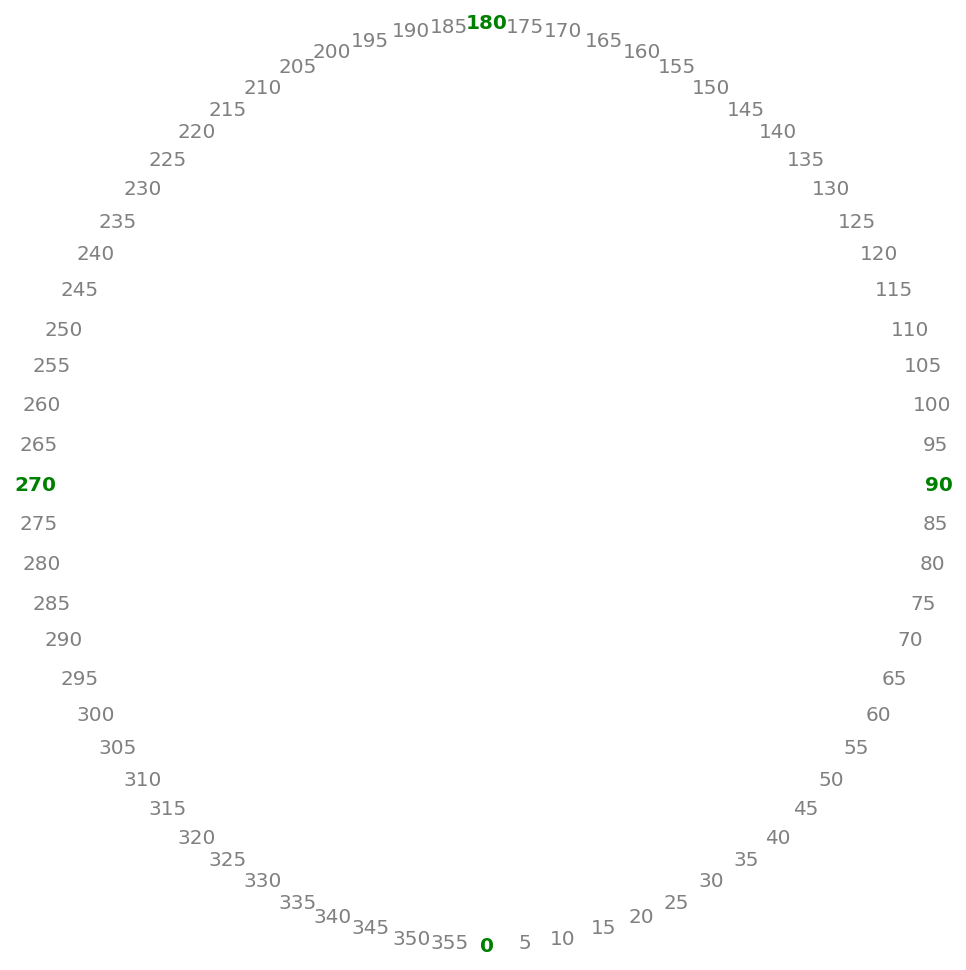

In [3]:

fig, ax = plt.subplots(figsize=(7, 7))
fig.tight_layout()
shu.add_elliptical_theta_labels(ax=ax, verbose=False)

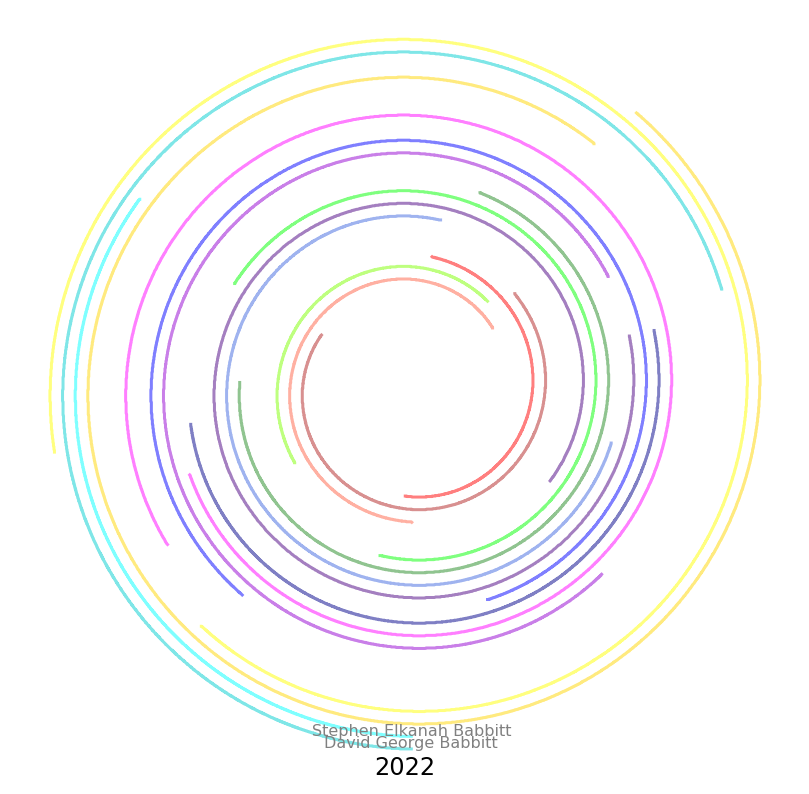

In [4]:

from datetime import date
import imageio

fig, ax = plt.subplots(figsize=(13, 13))
cw_history_year_dict = s.load_object('cw_history_year_dict')
test_movie_folder = os.path.join(shu.movie_folder, 'test')
os.makedirs(name=test_movie_folder, exist_ok=True)
today = date.today()
images_list = []
for bottom_year in range(min(cw_history_year_dict.keys()), today.year+1):
    ax.cla()
    shu.plot_year(bottom_year=bottom_year, history_year_dict=cw_history_year_dict, ax=ax, verbose=False)
    file_name = f'{bottom_year}.png'
    file_path = os.path.join(test_movie_folder, file_name)
    fig.savefig(file_path, transparent=False)
    images_list.append(imageio.imread(file_path))
    images_list.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(100):
    images_list.append(imageio.imread(file_path))

imageio.mimsave(os.path.join(shu.movie_folder, 'test.gif'), images_list)

In [8]:

bottom_year = 1961
birth_series = shu.patriline_df.year_of_birth
death_series = shu.patriline_df.year_of_death
mask_series = (bottom_year <= death_series) | death_series.isnull()
mask_series &= (bottom_year >= birth_series)
columns_list = ['year_of_birth', 'year_of_death', 'generation_name', 'archetype_name']
columns_list += [cn for cn in shu.patriline_df.columns if cn.endswith('_color')]
shu.patriline_df[mask_series][columns_list]

,year_of_birth,year_of_death,generation_name,archetype_name,xkcd_color,css4_color,xkcd_text_color,css4_text_color
patriarch_name,,,,,,,,
David George Babbitt,1961,NaN,13th,Nomad,xkcd:aqua blue,darkturquoise,black,black
"Joseph Robert Babbitt, Jr.",1932,2002.0,Silent,Artist,xkcd:bright yellow,yellow,black,black
"Joseph Robert Babbitt, Sr.",1891,1968.0,Lost,Nomad,xkcd:dandelion,gold,black,black


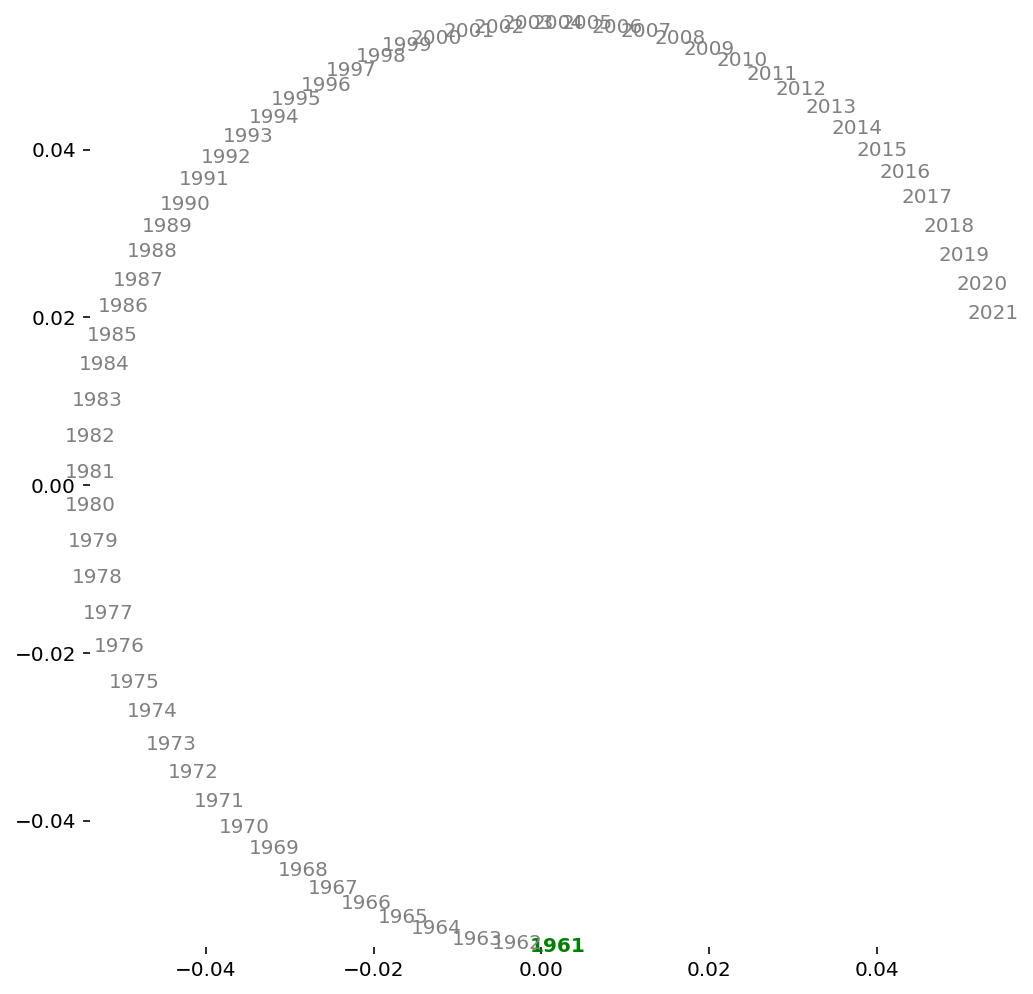

In [10]:

fig, ax = plt.subplots(figsize=(7, 7))
fig.tight_layout()
ccw_history_year_dict = s.load_object('ccw_history_year_dict')
years_list = [ts.year for ts in pd.date_range(start=pd.datetime(1961, 1, 1), end=pd.datetime(2022, 1, 1), freq='A').to_list()]
shu.add_theta_labels(ax=ax, years_list=years_list, history_year_dict=ccw_history_year_dict, bottom_year=1961, verbose=False)

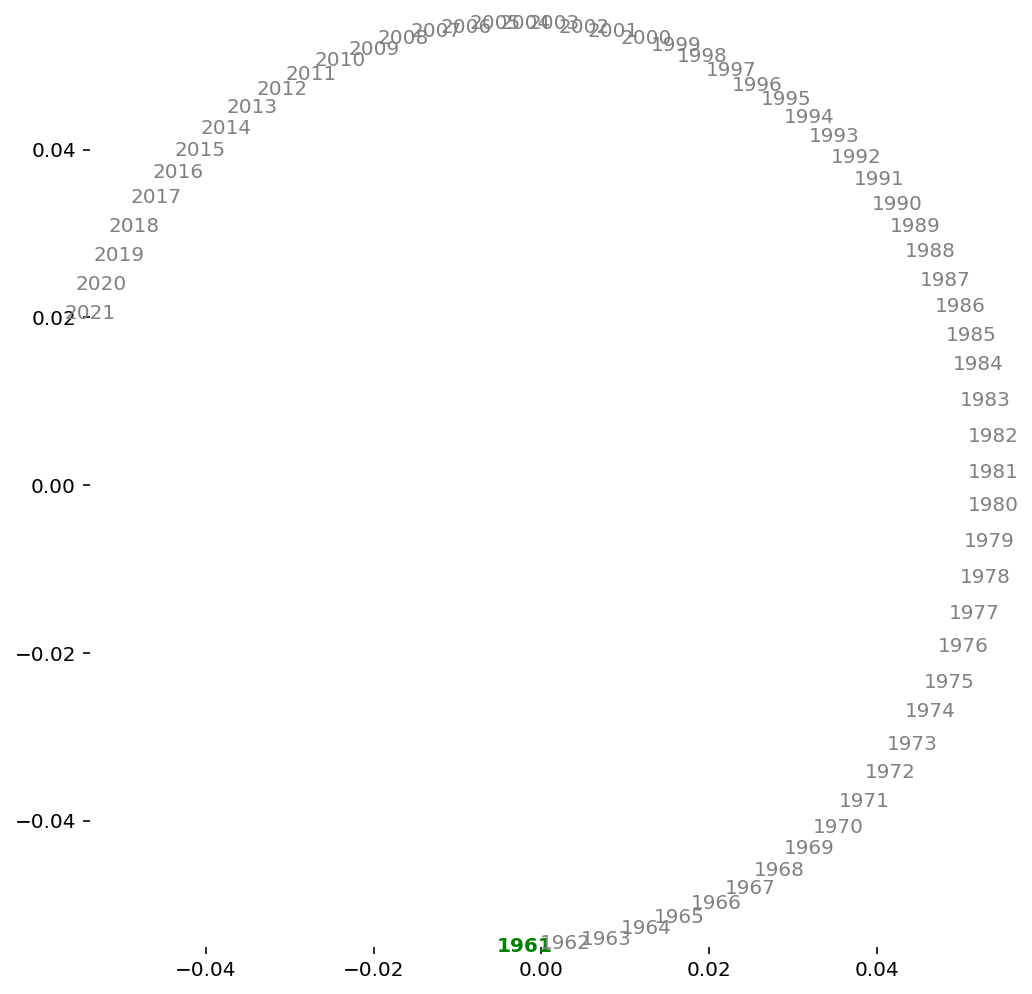

In [11]:

fig, ax = plt.subplots(figsize=(7, 7))
fig.tight_layout()
cw_history_year_dict = s.load_object('cw_history_year_dict')
years_list = [ts.year for ts in pd.date_range(start=pd.datetime(1961, 1, 1), end=pd.datetime(2022, 1, 1), freq='A').to_list()]
shu.add_theta_labels(ax=ax, years_list=years_list, history_year_dict=cw_history_year_dict, bottom_year=1961, verbose=False)

In [9]:

from sklearn.preprocessing import normalize
from IPython.display import HTML

def min_max_norm(dataset):
    if isinstance(dataset, list):
        norm_list = list()
        min_value = min(dataset)
        max_value = max(dataset)

        for value in dataset:
            tmp = (value - min_value) / (max_value - min_value)
            norm_list.append(tmp)

    return norm_list
def get_row_str(row_header, value_list, sum_value):
    min_value = min(value_list)
    max_value = max(value_list)
    value_list = [str(round(v, 2)) for v in value_list]
    row_str = f'<tr><td>{row_header}</td><td>'
    row_str += '</td><td>'.join(value_list)
    row_str += f'</td><td>{sum_value:.2f}</td><td>{min_value:.2f}</td><td>{max_value:.2f}</td></tr>'
    
    return row_str
rows_str = '<table><tr><th>Name</th><th>0</th><th>1</th><th>2</th><th>3</th><th>4</th><th>Sum</th><th>Min</th><th>Max</th></tr>'
raw_list = [-1.0, -0.5, 0.0, 0.5, 1.0]
rows_str += get_row_str('raw', raw_list, sum(raw_list))
for norm in ['l1', 'l2', 'max', 'min_max']:
    if norm != 'min_max':
        norm_list = normalize([raw_list], norm=norm)[0]
    else:
        norm_list = min_max_norm(raw_list)
    rows_str += get_row_str(norm, norm_list, sum(norm_list))
rows_str += '</table>'
HTML(rows_str)

Name,0,1,2,3,4,Sum,Min,Max
raw,-1.0,-0.5,0.0,0.5,1.0,0.00,-1.00,1.00
l1,-0.33,-0.17,0.0,0.17,0.33,-0.00,-0.33,0.33
l2,-0.63,-0.32,0.0,0.32,0.63,0.00,-0.63,0.63
max,-1.0,-0.5,0.0,0.5,1.0,0.00,-1.00,1.00
min_max,0.0,0.25,0.5,0.75,1.0,2.50,0.00,1.00


In [4]:

history_year_dict = s.load_object('cw_history_year_dict')
bottom_year = 1961
bottom_radius, bottom_theta = history_year_dict[bottom_year]
history_year_dict = {year: (radius, theta - bottom_theta - 90) for year, (radius, theta) in history_year_dict.items()}
left_theta = -90 + np.sign(bottom_theta)*90
right_theta = -90 - np.sign(bottom_theta)*90
history_year_dict = {year: (radius, theta) for year, (radius, theta) in history_year_dict.items() if left_theta <= (theta % 360) <= right_theta}
history_year_dict

{}

In [ ]:

history_year_dict = s.load_object('cw_history_year_dict')
for year, (radius, theta) in history_year_dict.items():
    left_theta = -90 + np.sign(bottom_theta)*90
    right_theta = -90 - np.sign(bottom_theta)*90
    print(left_theta, -(theta % 360), right_theta, (left_theta >= -(theta % 360) >= right_theta))

In [12]:

# Get horizontal to vertical ratio of the inner oval
from xml.dom import minidom

svg_folder = os.path.join(s.data_folder, 'svg')
svg_file = os.path.join(svg_folder, 'inner_oval.svg')
doc = minidom.parse(svg_file)
path_strings = [path.getAttribute('d') for path in doc.getElementsByTagName('path')]
doc.unlink()
xy_strs_list = re.split(r'\s+', path_strings[0].split('C')[1].strip(), 0)[:-1]
x_list = [float(xy_str.split(',')[0]) for xy_str in xy_strs_list]
y_list = [float(xy_str.split(',')[1]) for xy_str in xy_strs_list]
horizontal_radius = abs(max(x_list) - min(x_list))/2
vertical_radius = abs(max(y_list) - min(y_list))/2
horizontal_radius / vertical_radius

1.119015486577854

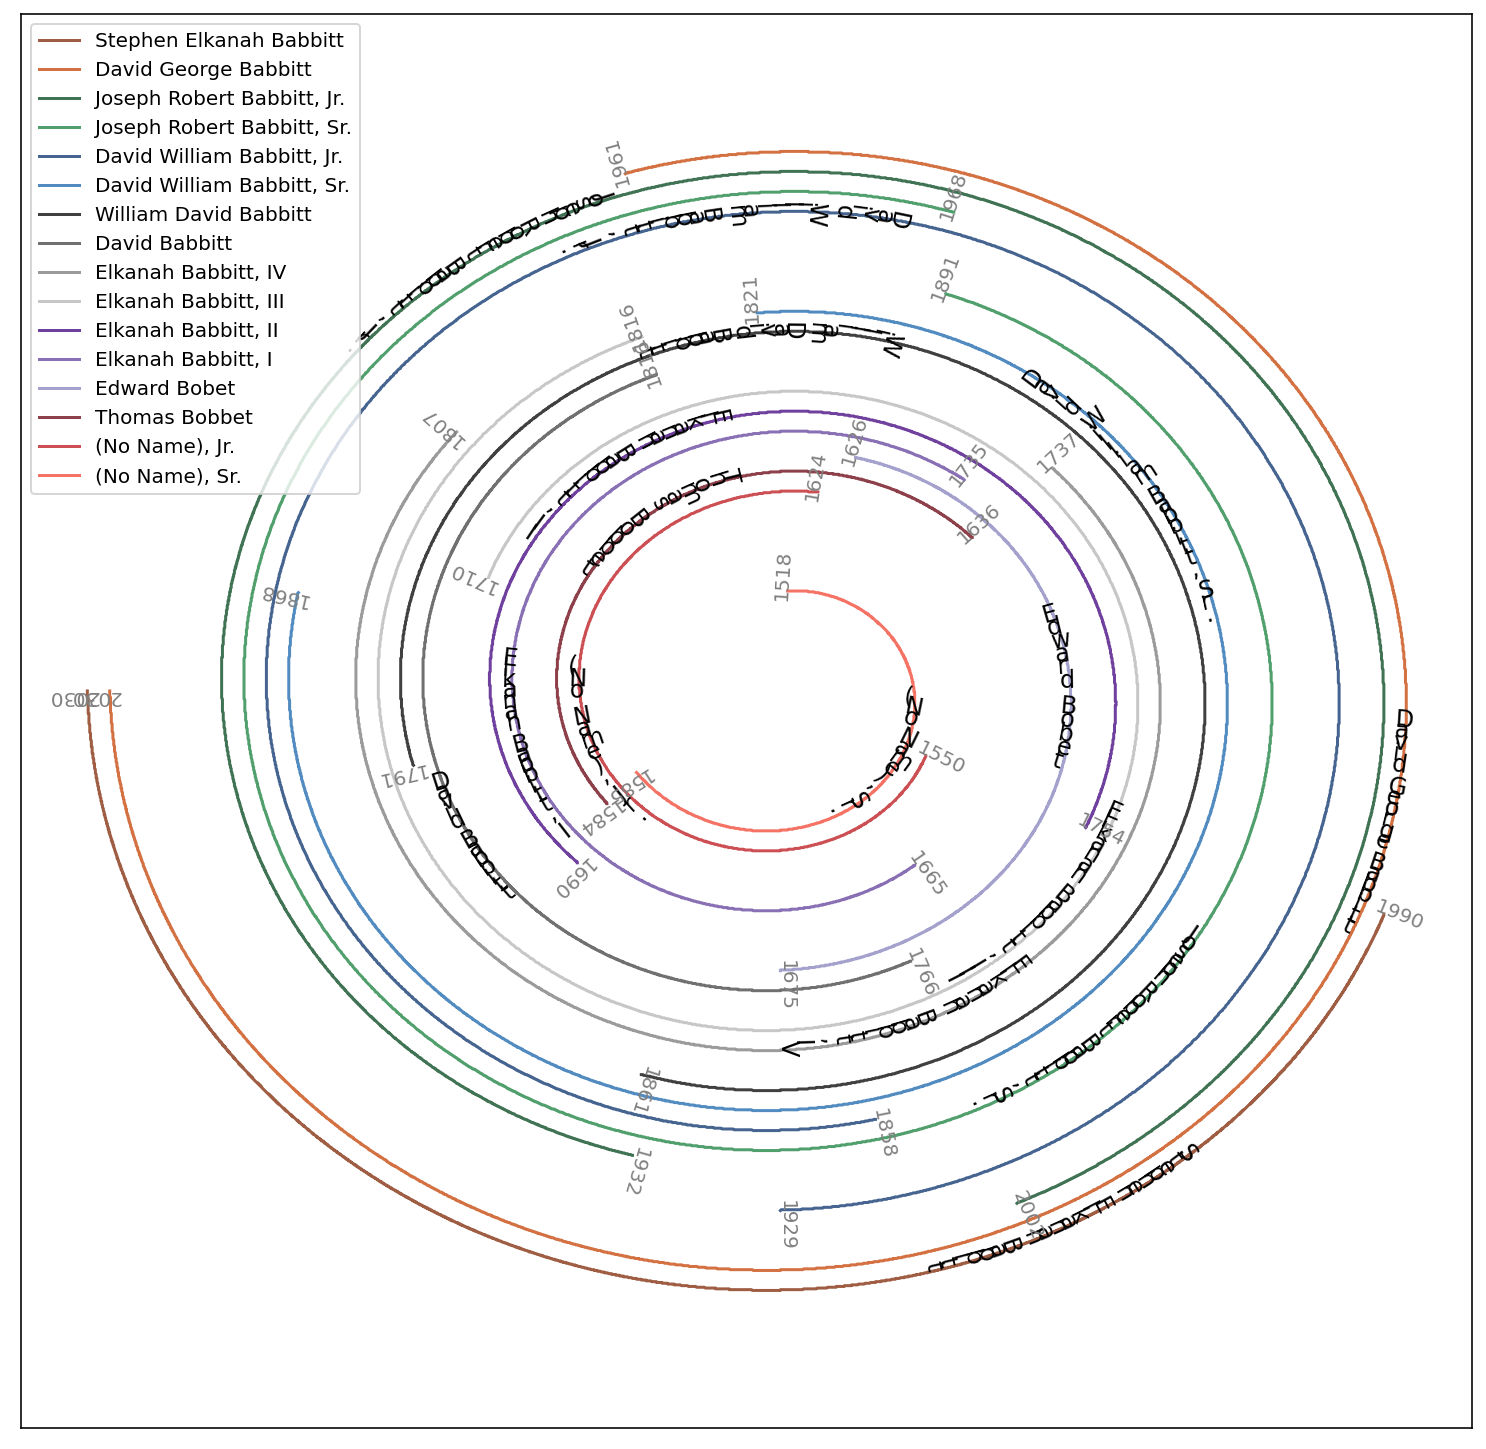

In [11]:

ccw_history_year_dict = s.load_object('ccw_history_year_dict')
ccw_history_theta_dict = s.load_object('ccw_history_theta_dict')
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
shu.show_elliptical_babbitt_plot(history_year_dict=ccw_history_year_dict, history_theta_dict=ccw_history_theta_dict,
                                 aspect_ratio=1.119015486577854, ax=ax)

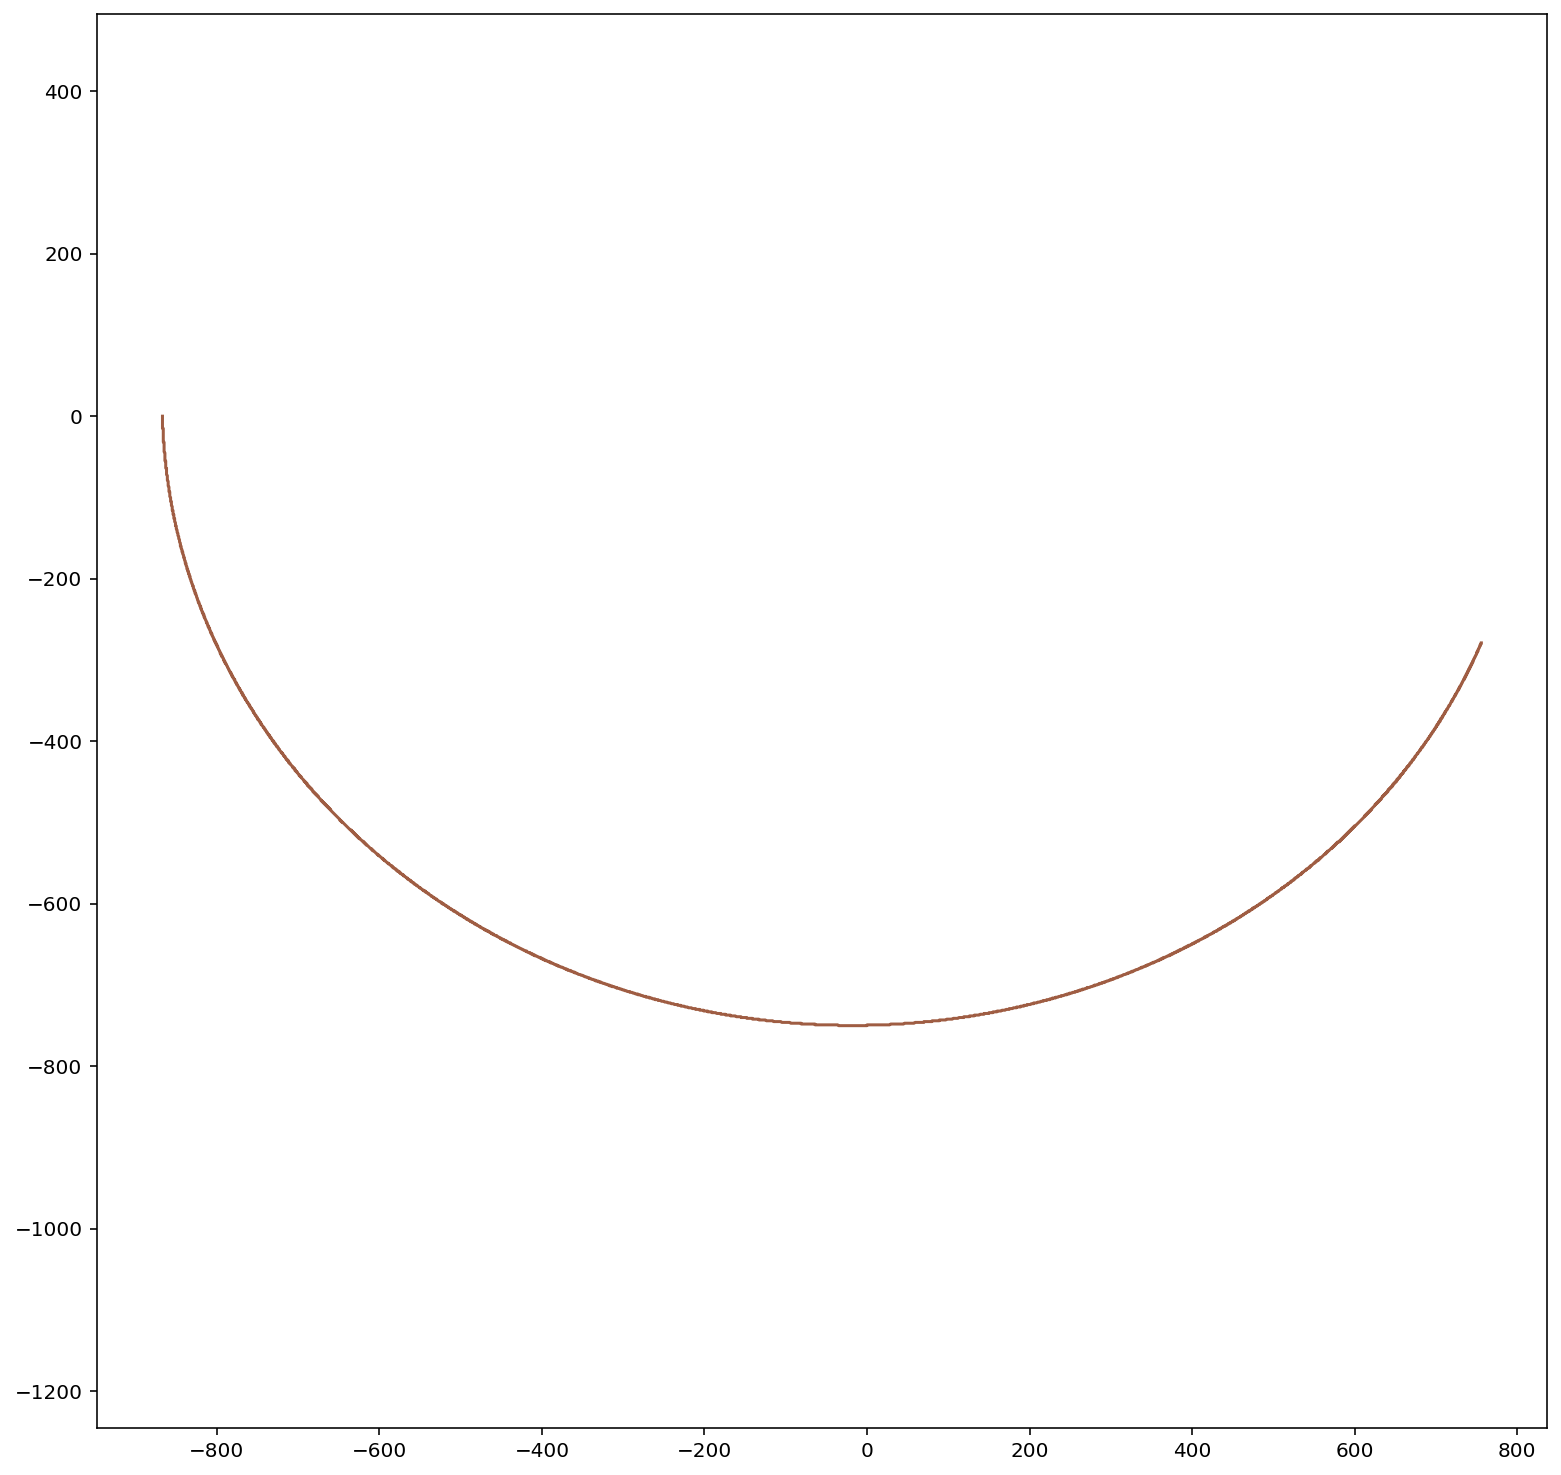

In [9]:

aspect_ratio = 1.1193862644404413
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-1000*aspect_ratio, 1000*aspect_ratio)
ax.set_ylim(-1000, 1000)
axis_tuple = ax.axis('equal')
i = shu.patriline_df.shape[0]-1
d = 5
previous_saeculum = shu.patriline_df.head(1).saeculum_name.tolist()[0]
for patriarch_name, row_series in shu.patriline_df.iterrows():
    start_year = int(row_series['year_of_birth'])
    stop_year = row_series['year_of_death']
    try:
        stop_year = int(stop_year)
    except:
        stop_year = start_year + 80
        if stop_year > max(ccw_history_year_dict.keys()):
            stop_year = max(ccw_history_year_dict.keys())
    xy_list = shu.get_one_elliptical_arc(
        start_year=start_year, stop_year=stop_year,
        history_year_dict=ccw_history_year_dict, i=i,
        aspect_ratio=aspect_ratio
    )
    saeculum = row_series['saeculum_name']
    if saeculum != previous_saeculum:
        previous_saeculum = saeculum
        d = 5
    cmap = shu.saeculum_cmap_dict[saeculum]
    c = plt.get_cmap(cmap)(np.linspace(0, 1, 6))[d]
    x_list = [x[0] for x in xy_list]
    y_list = [y[1] for y in xy_list]
    PathCollection_obj = plt.plot(
        x_list, y_list, alpha=0.75, label=patriarch_name, c=c
    )
    break

In [3]:

dataframes_dict = s.load_dataframes(generations_df='generations_df', patriline_df='patriline_df',
                                    turnings_df='turnings_df')

Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\generations_df.pkl.
Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\patriline_df.pkl.
Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\turnings_df.pkl.


In [4]:

patriline_df = dataframes_dict['patriline_df']
patriline_df.sample(5).T

patriarch_name,"Joseph Robert Babbitt, Jr.","Elkanah Babbitt, IV",William David Babbitt,"David William Babbitt, Sr.","(No Name), Jr."
year_of_birth,1932,1737,1791,1821,1550
year_of_death,2002.0,1807.0,1861.0,1868.0,1624.0
generation_name,Silent,Liberty,Compromise,Transcendental,Elizabethan
date_of_birth,6-Apr-32,"December 05, 1737","October 26, 1791","May 04, 1821",1550
place_of_birth,"Mesa, Maricopa County, Arizona, United States","New Milford, New Haven County, Connecticut","Berkshire, Berkshire, MA, United States","Berkshire, Berkshire, MA, United States",Unknown Place of Birth
birth_longitude,33.395624,41.22266,42.393067,42.393067,NaN
birth_latitude,-111.807798,-73.085769,-73.508626,-73.508626,NaN
date_of_death,"March 31, 2002 (69)","February 09, 1807 (69)","May 28, 1861 (69)","October 13, 1868 (47)","April 01, 1624 (74)"
place_of_death,"NM, United States (Multiple Myloma (Cancer))","Fly Creek, Otsego County, New York, United States","Berkshire, Berkshire, MA, United States","Cinncinnati, Hamilton, OH, United States",Unknown Place of Death
death_longitude,35.682613,42.718423,42.393067,39.136452,NaN


In [5]:

generations_df = dataframes_dict['generations_df']
generations_df.sample(5).T

generation_name,Cavalier,Gilded,Parliamentary,Alpha,Homeland
childhood_turning_entered,2,2,4,1,4
saeculum_name,New World,Civil War,Reformation,Meta Modern,Millennial
turnings_archetype,Nomad,Nomad,Artist,Prophet,Artist
generations_archetype,Reactive,Reactive,Adaptive,Idealist,Adaptive
birth_year_begin,1618,1822,1566,2024,2005
birth_year_end,1647.0,1842.0,1587.0,2042.0,2023.0
childhood_turning_description,"Puritan Awakening,Antinomian Controversy","Transcendental Awakening, Romanticism, Aboliti...",Armada Crisis,NaN,"War on Terror, Climate Change, Opioid epidemic..."
turning_year_begin,1621,1822,1569,2027,2008
turning_year_end,1649.0,1844.0,1594.0,2045.0,2026.0
wikipedia_url,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Generation_Alpha,https://en.wikipedia.org/wiki/Generation_Z


In [6]:

if not s.pickle_exists('saeculum_cmap_dict'):
    cmap_list = ['Reds', 'Purples', 'Greys', 'Blues', 'Greens', 'Oranges']
    cmap_list.reverse()
    saeculum_cmap_dict = {}
    for saeculum, cmap_str in zip(patriline_df['Saeculum Name'].unique(), cmap_list):
        saeculum_cmap_dict[saeculum] = cmap_str
    s.store_objects(saeculum_cmap_dict=saeculum_cmap_dict)

In [7]:

turnings_df = dataframes_dict['turnings_df']
turnings_df.sample(5).T

turning_name,The Armada Crisis,The Global Financial Crisis,The Great Depression & World War II,Reconstruction & Gilded Age,The Transcendental Awakening
turning_number,4,4,4,1,2
turning_year_begin,1569,2008,1929,1865,1822
turning_year_end,1594,2029,1946,1886,1844
saeculum_name,Tudor,Millennial,Great Power,Great Power,Civil War
entering_elderhood,Reformation,Boomers,Missionaries,Transcendentals,Republicans
entering_midlife,Reprisal,Xers,Lost,Gilded,Compromisers
entering_young_adulthood,Elizabethans,Millennials,G.I.s,Progressives,Transcendentals
entering_childhood,Parliamentarians,Homelanders,Silent,Missionaries,Gilded
turning_notes,"The Armada Crisis (Fourth Turning, 1569–1594) ...","The Global Financial Crisis (Fourth Turning, 2...",The Great Depression & World War II (Fourth Tu...,"Reconstruction & Gilded Age (First Turning, 18...","The Transcendental Awakening (Second Turning, ..."


In [8]:

ccw_history_radius_dict = s.load_object('ccw_history_radius_dict')
cw_history_radius_dict = s.load_object('cw_history_radius_dict')
cw_history_year_dict = s.load_object('cw_history_year_dict')
cw_history_theta_dict = s.load_object('cw_history_theta_dict')

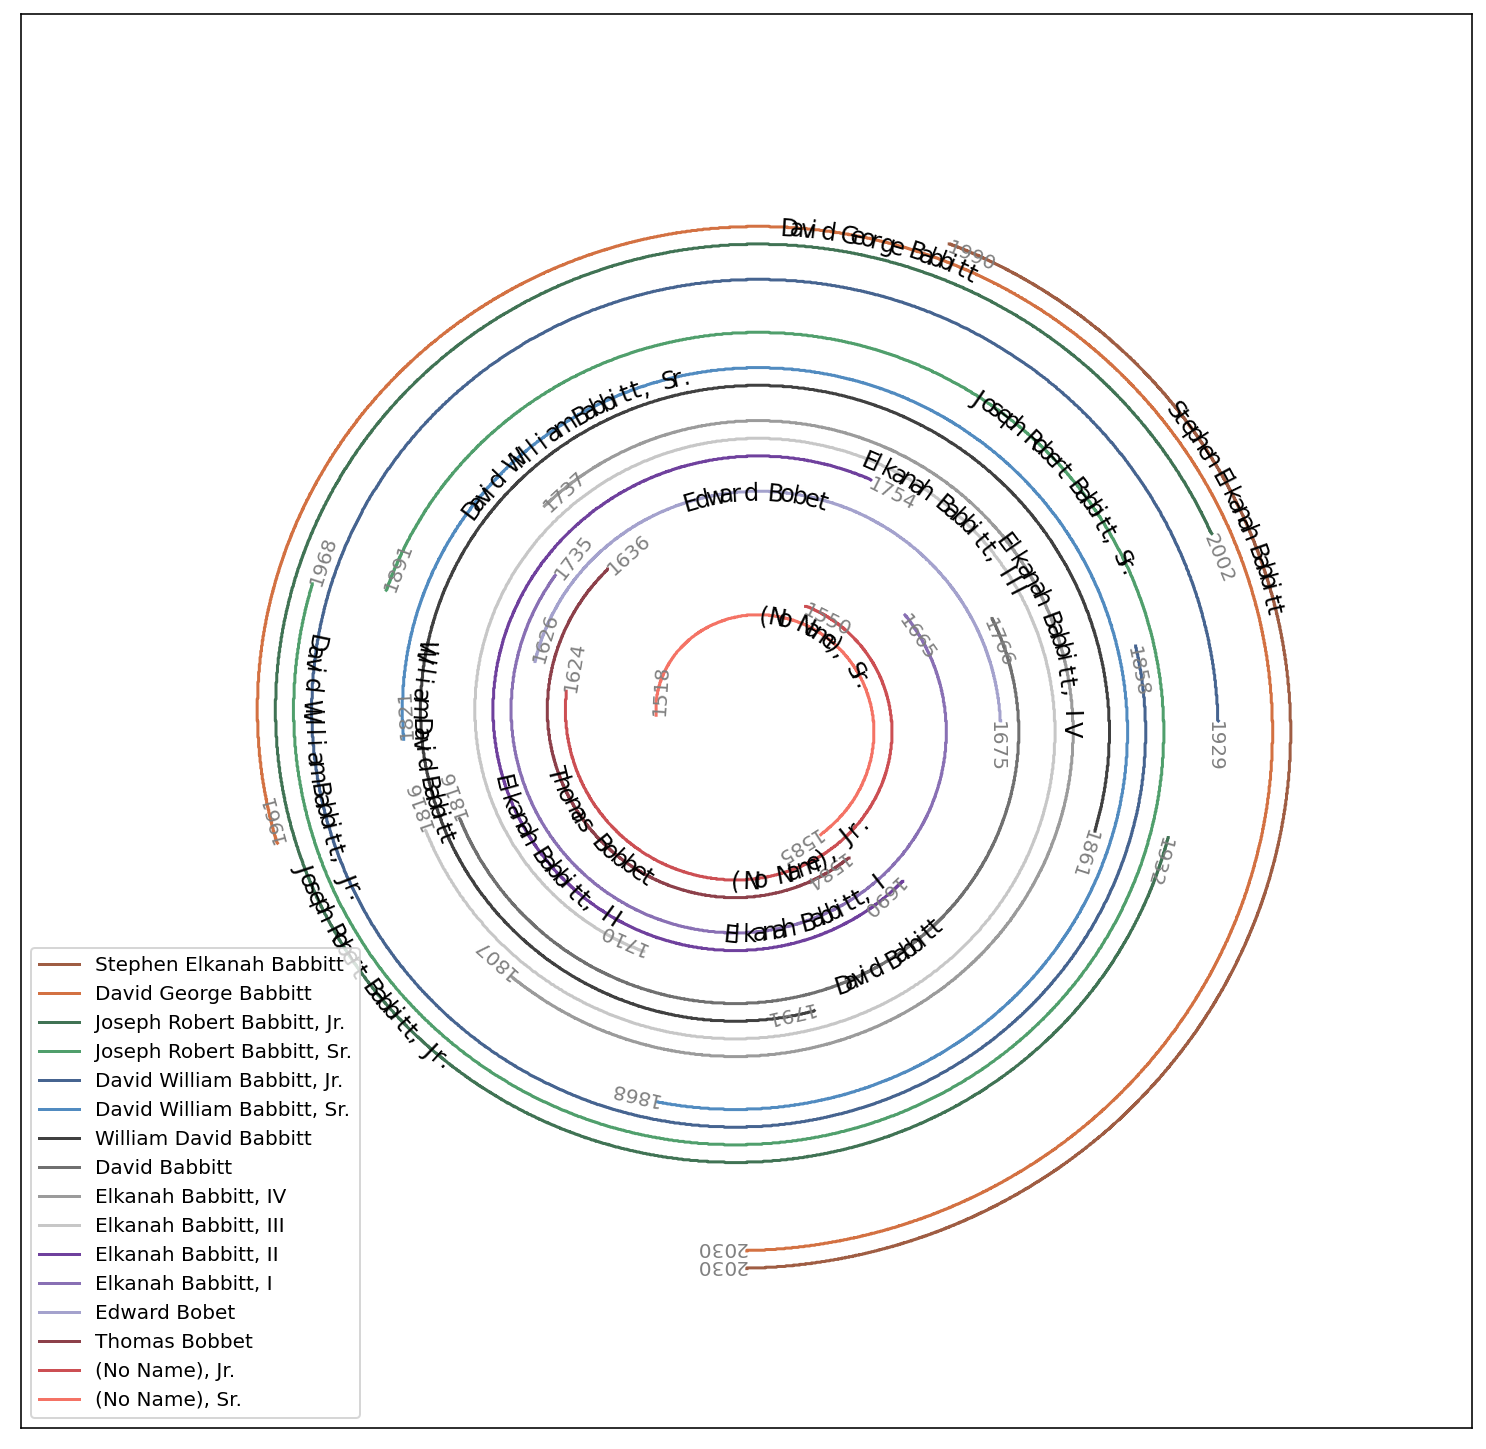

In [9]:

shu.show_babbitt_plot(history_year_dict=ccw_history_year_dict, history_theta_dict=ccw_history_theta_dict)

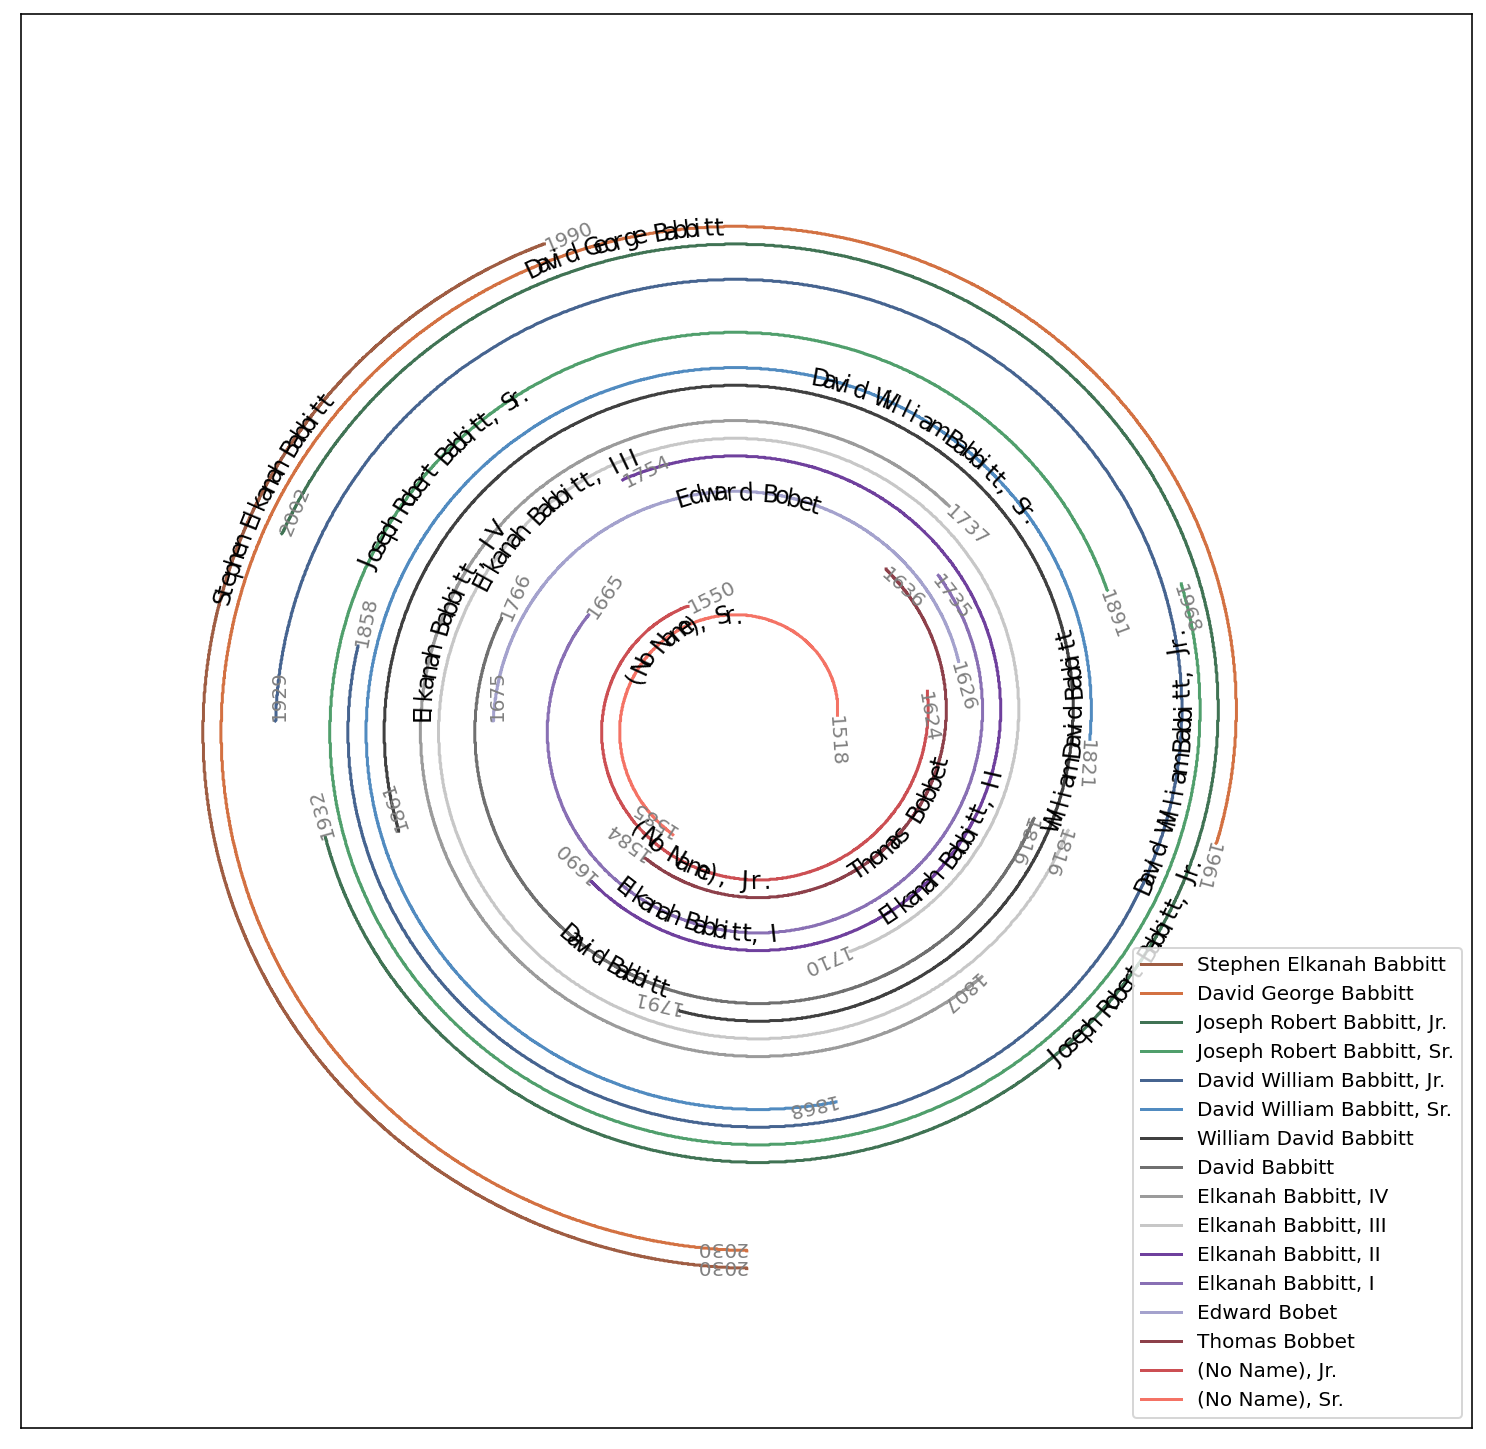

In [21]:

shu.show_babbitt_plot(history_year_dict=cw_history_year_dict, history_theta_dict=cw_history_theta_dict)

In [22]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = '"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [159]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))